In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1.1

In [2]:
df = pd.read_csv("/content/daily_sales_metrics.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)
df.head()

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,year
0,2022-01-01,506994,1081,34861,25148,0,5,1,52,1,2022
1,2022-01-02,445834,819,32858,23769,0,6,2,52,1,2022
2,2022-01-03,348150,736,23081,22108,0,0,3,1,1,2022
3,2022-01-04,359418,872,25166,21757,0,1,4,1,1,2022
4,2022-01-05,381439,871,31082,21420,0,2,5,1,1,2022


## EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1095 non-null   datetime64[ns]
 1   gmv              1095 non-null   int64         
 2   orders           1095 non-null   int64         
 3   sessions         1095 non-null   int64         
 4   marketing_spend  1095 non-null   int64         
 5   is_promo_active  1095 non-null   int64         
 6   day_of_week      1095 non-null   int64         
 7   day_of_year      1095 non-null   int64         
 8   week_of_year     1095 non-null   int64         
 9   month            1095 non-null   int64         
 10  year             1095 non-null   int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 94.2 KB


In [8]:
df.describe()

,date,gmv,orders,sessions,marketing_spend,is_promo_active,day_of_week,day_of_year,week_of_year,month,year
count,1095,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.00000
mean,2023-07-02 00:00:00,8.287837e+05,3924.099543,126718.787215,41729.171689,0.053881,3.001826,183.000000,26.523288,6.516895,2023.00000
min,2022-01-01 00:00:00,2.880060e+05,736.000000,23081.000000,17934.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2022.00000
25%,2022-10-01 12:00:00,6.512695e+05,2377.500000,79303.000000,32603.000000,0.000000,1.000000,92.000000,13.500000,4.000000,2022.00000
50%,2023-07-02 00:00:00,8.058020e+05,3959.000000,123874.000000,40300.000000,0.000000,3.000000,183.000000,27.000000,7.000000,2023.00000
75%,2024-03-31 12:00:00,9.789980e+05,5292.500000,167948.500000,48873.000000,0.000000,5.000000,274.000000,40.000000,10.000000,2024.00000
max,2024-12-30 00:00:00,1.698764e+06,9253.000000,304300.000000,91841.000000,1.000000,6.000000,365.000000,52.000000,12.000000,2024.00000
std,NaN,2.348056e+05,1731.068851,56433.429110,11726.318302,0.225886,2.003196,105.414174,15.053930,3.448158,0.81687


In [9]:
print(f"Диапазон дат: {df['date'].min()} — {df['date'].max()}")

Диапазон дат: 2022-01-01 00:00:00 — 2024-12-30 00:00:00


Присутствует сезонная активность по фактическиму GMV.

Видим возрастающий тренд по количеству заказов и сумме затрат на маркетинг.

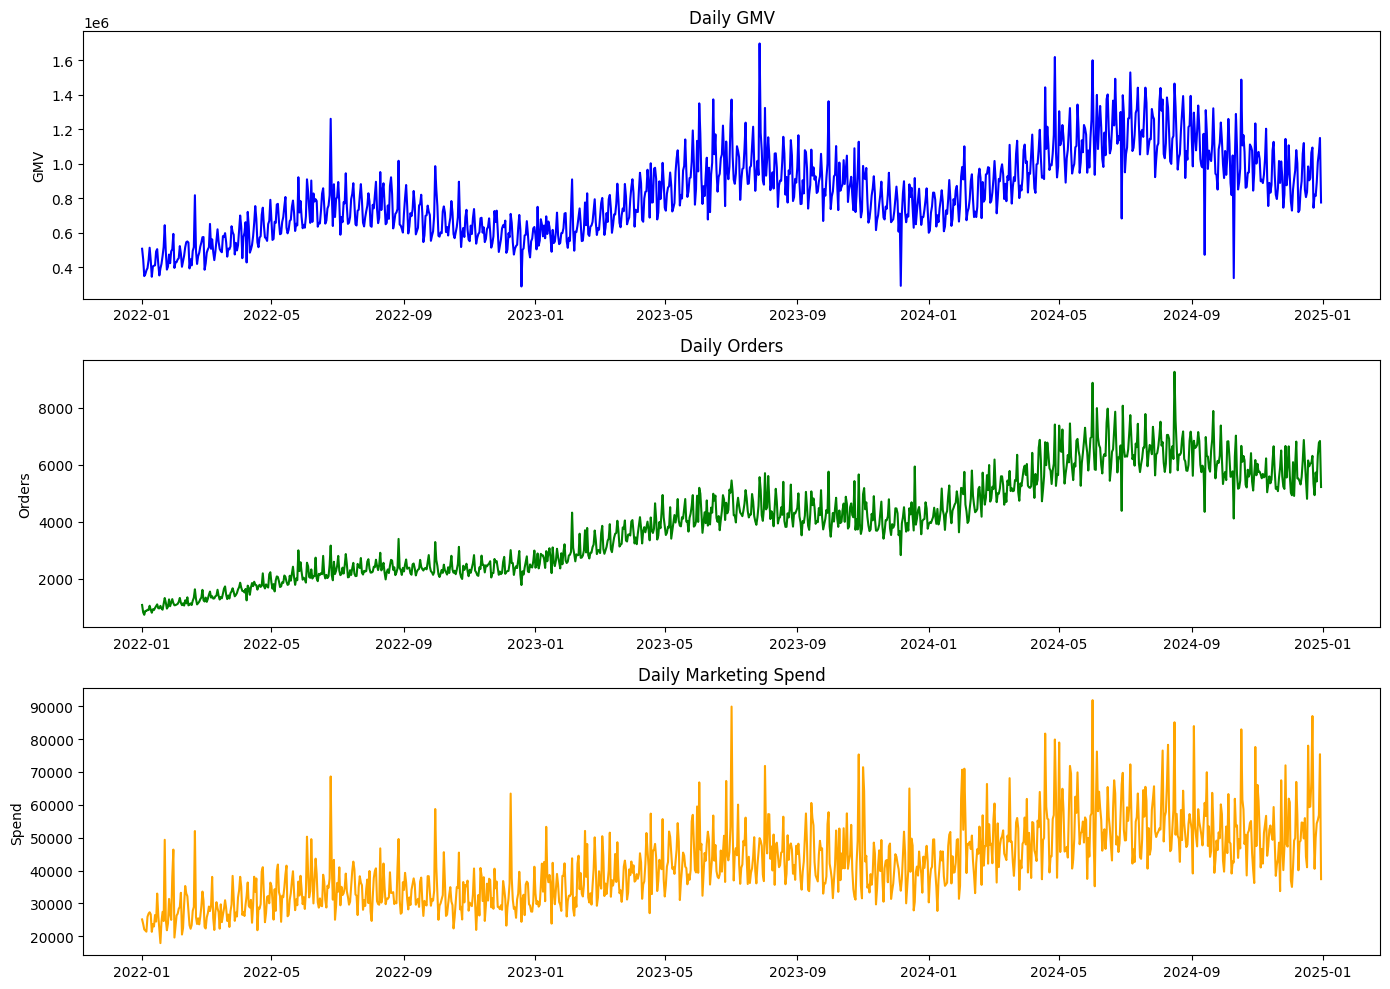

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(df['date'], df['gmv'], label='GMV', color='blue')
axes[0].set_title('Daily GMV')
axes[0].set_ylabel('GMV')

axes[1].plot(df['date'], df['orders'], label='Orders', color='green')
axes[1].set_title('Daily Orders')
axes[1].set_ylabel('Orders')

axes[2].plot(df['date'], df['marketing_spend'], label='Marketing Spend', color='orange')
axes[2].set_title('Daily Marketing Spend')
axes[2].set_ylabel('Spend')

plt.tight_layout()
plt.show()

С активированной крупной промо-акцией фактический GMV, количество заказов и траты на маркетинг растут

In [40]:
promo_effect = df.groupby('is_promo_active')[['gmv','orders', 'marketing_spend']].agg(['mean']).round(2)
promo_effect.columns = ['Средний GMV',
                        'Среднее количество заказов',
                        'Средние затраты на маркетинг']
promo_effect

,Средний GMV,Среднее количество заказов,Средние затраты на маркетинг
is_promo_active,,,
0,817346.25,3882.32,40619.57
1,1029618.02,4657.68,61212.97


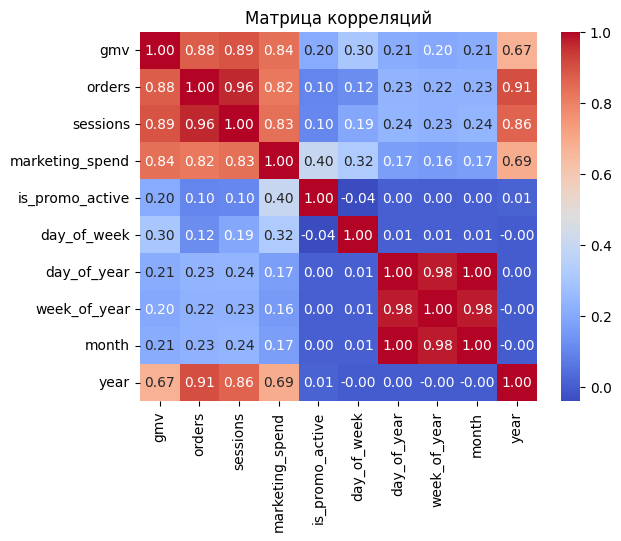

In [19]:
sns.heatmap(df.drop(["date"], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

## Feature Engineering

добавим лаги для прогнозирования временных рядов

In [3]:
for lag in [1, 2, 3, 7, 14]:
    df[f'gmv_lag_{lag}'] = df['gmv'].shift(lag)
    df[f'orders_lag_{lag}'] = df['orders'].shift(lag)
    df[f'sessions_lag_{lag}'] = df['sessions'].shift(lag)
    df[f'marketing_spend_lag_{lag}'] = df['marketing_spend'].shift(lag)

добавим сезонные признаки

In [4]:
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365)
df['day_trend'] = np.arange(len(df))

добавим признаки со скользящим средним

In [5]:
for window in [3, 7, 14]:
    df[f'gmv_ma_{window}'] = df['gmv'].rolling(window).mean().shift(1)
    df[f'orders_ma_{window}'] = df['orders'].rolling(window).mean().shift(1)
    df[f'sessions_ma_{window}'] = df['sessions'].rolling(window).mean().shift(1)

In [6]:
HORIZON = 7
df[f'gmv_target_{HORIZON}'] = df['gmv'].shift(-HORIZON)
df[f'orders_target_{HORIZON}'] = df['orders'].shift(-HORIZON)

In [7]:
df_clean = df.dropna()

## Обучение модели

In [8]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.5 MB/s eta 0:00:00


In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from catboost import CatBoostRegressor, Pool
import numpy as np

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

gmv_mape_scores = []
orders_mape_scores = []

features = [col for col in df_clean.columns if col not in ['date', f'gmv_target_{HORIZON}', f'orders_target_{HORIZON}']]
X = df_clean[features]
y_gmv = df_clean[f'gmv_target_{HORIZON}']
y_orders = df_clean[f'orders_target_{HORIZON}']

cat_features = ["day_of_week", "day_of_year", "is_promo_active", "week_of_year"]


for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f"Fold {fold+1}/{n_splits}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_gmv_train, y_gmv_test = y_gmv.iloc[train_index], y_gmv.iloc[test_index]
    y_orders_train, y_orders_test = y_orders.iloc[train_index], y_orders.iloc[test_index]

    gmv_model_cv = CatBoostRegressor(
        iterations=10000,
        learning_rate=0.01,
        depth=4,
        loss_function='RMSE',
        eval_metric='MAPE',
        random_seed=42,
        verbose=False
    )
    gmv_model_cv.fit(X_train, y_gmv_train,
                     eval_set=(X_test, y_gmv_test),
                     early_stopping_rounds=100,
                     cat_features=cat_features)
    pred_gmv_cv = gmv_model_cv.predict(X_test)
    mape_gmv_cv = mean_absolute_percentage_error(y_gmv_test, pred_gmv_cv)
    gmv_mape_scores.append(mape_gmv_cv)
    print(f"  GMV MAPE: {mape_gmv_cv * 100:.2f}%")

    orders_model_cv = CatBoostRegressor(
        iterations=10000,
        learning_rate=0.01,
        depth=4,
        loss_function='RMSE',
        eval_metric='MAPE',
        random_seed=42,
        verbose=False
    )
    orders_model_cv.fit(X_train, y_orders_train,
                        eval_set=(X_test, y_orders_test),
                        early_stopping_rounds=100,
                        cat_features=cat_features)

    pred_orders_cv = orders_model_cv.predict(X_test)
    mape_orders_cv = mean_absolute_percentage_error(y_orders_test, pred_orders_cv)
    orders_mape_scores.append(mape_orders_cv)
    print(f"  Orders MAPE: {mape_orders_cv * 100:.2f}%")

print("\nCross-validation results:")
print(f"Average GMV MAPE: {np.mean(gmv_mape_scores) * 100:.2f}%")
print(f"Average Orders MAPE: {np.mean(orders_mape_scores) * 100:.2f}%")

Fold 1/5
  GMV MAPE: 11.67%
  Orders MAPE: 10.93%
Fold 2/5
  GMV MAPE: 9.94%
  Orders MAPE: 28.20%
Fold 3/5
  GMV MAPE: 10.80%
  Orders MAPE: 6.56%
Fold 4/5
  GMV MAPE: 7.06%
  Orders MAPE: 19.88%
Fold 5/5
  GMV MAPE: 8.85%
  Orders MAPE: 5.48%

Cross-validation results:
Average GMV MAPE: 9.66%
Average Orders MAPE: 14.21%


In [12]:
split_idx = len(X) - HORIZON
X_train_full, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_gmv_train_full, y_gmv_test = y_gmv.iloc[:split_idx], y_gmv.iloc[split_idx:]
y_orders_train_full, y_orders_test = y_orders.iloc[:split_idx], y_orders.iloc[split_idx:]

In [14]:
# Обучение финальной модели GMV
final_gmv_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=4,
    loss_function='RMSE',
    eval_metric='MAPE',
    random_seed=42,
    verbose=500
)
final_gmv_model.fit(
    X_train_full, y_gmv_train_full,
    cat_features=cat_features
)

# Обучение финальной модели Orders
final_orders_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.01,
    depth=4,
    loss_function='RMSE',
    eval_metric='MAPE',
    random_seed=42,
    verbose=500
)
final_orders_model.fit(
    X_train_full, y_orders_train_full,
    cat_features=cat_features
)

0:	learn: 0.2442951	total: 3.77ms	remaining: 3.76s
500:	learn: 0.0654593	total: 1.5s	remaining: 1.5s
999:	learn: 0.0594831	total: 3.74s	remaining: 0us
0:	learn: 0.4919771	total: 3.52ms	remaining: 3.52s
500:	learn: 0.0598637	total: 1.48s	remaining: 1.48s
999:	learn: 0.0534152	total: 3.23s	remaining: 0us


## Визуализация предсказаний на 7 дней

GMV MAPE: 4.40%


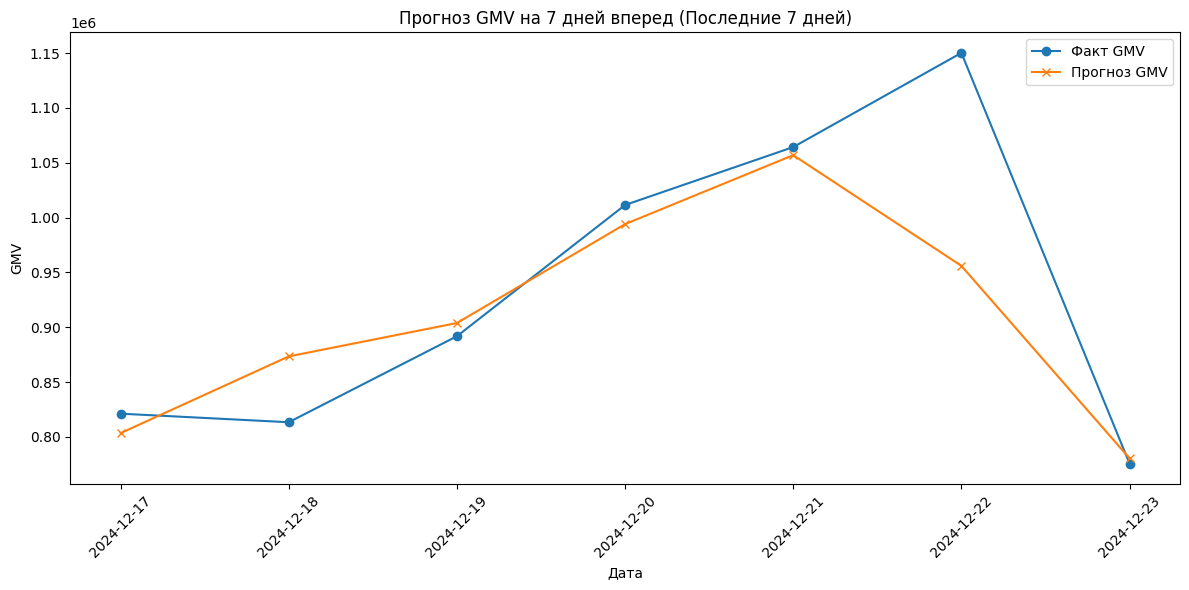

In [21]:
test_dates = df_clean['date'][split_idx:]

y_gmv_pred = final_gmv_model.predict(X_test)
print(f"GMV MAPE: {mean_absolute_percentage_error(y_gmv_test, y_gmv_pred) * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_gmv_test.values, label='Факт GMV', marker='o')
plt.plot(test_dates, y_gmv_pred, label='Прогноз GMV', marker='x')
plt.title('Прогноз GMV на 7 дней вперед (Последние 7 дней)')
plt.xlabel('Дата')
plt.ylabel('GMV')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Orders MAPE: 4.96%


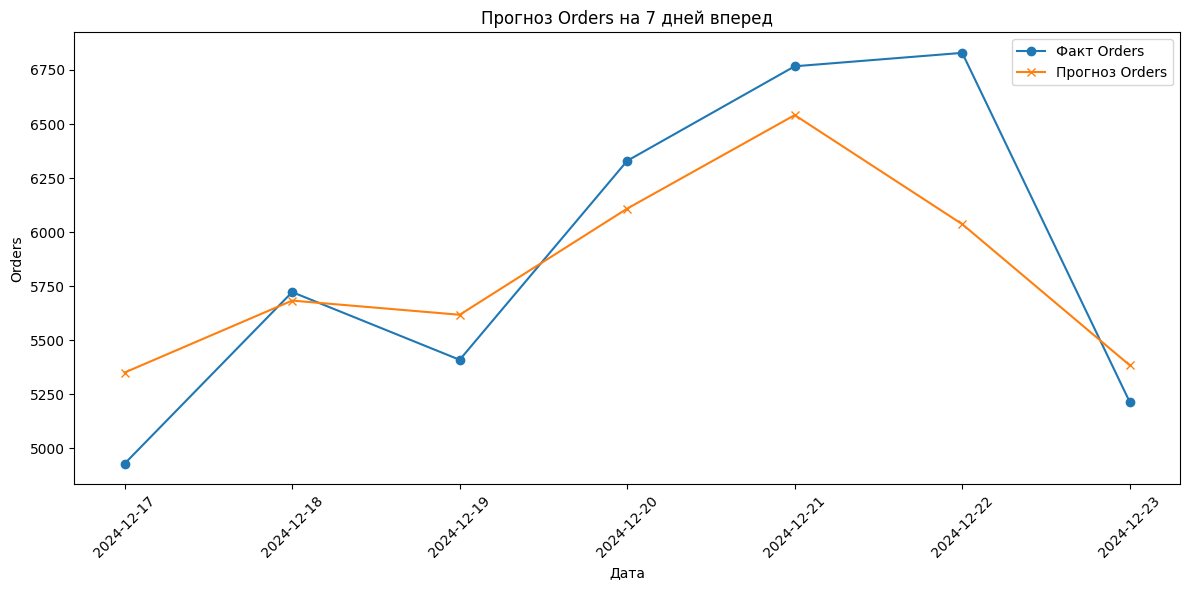

In [22]:
y_orders_pred = final_orders_model.predict(X_test)
print(f"Orders MAPE: {mean_absolute_percentage_error(y_orders_test, y_orders_pred) * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_orders_test.values, label='Факт Orders', marker='o')
plt.plot(test_dates, y_orders_pred, label='Прогноз Orders', marker='x')
plt.title('Прогноз Orders на 7 дней вперед')
plt.xlabel('Дата')
plt.ylabel('Orders')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На кросс-валидации мы видим, что по предсказаниям GMV MAPE у нас < 10%, что показывается отличный результат

По предсказаниям по количеству заказов MAPE между 10-20%, что тоже является хорошим показателем качества модели

# Задача 1.2

In [57]:
residuals_gmv = np.abs(y_gmv_test.values - y_gmv_pred)

std_residuals_gmv = np.std(residuals_gmv)
print(f"Стандартное отклонение остатков для GMV: {std_residuals_gmv}")

Стандартное отклонение остатков для GMV: 63396.24333937037


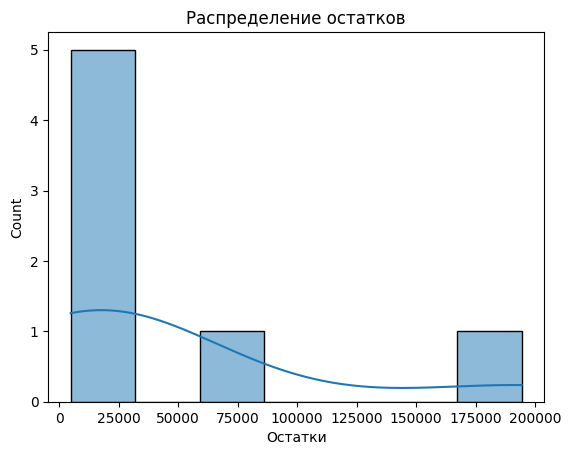

p-value теста Шапиро-Уилка: 0.0009


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals_gmv, kde=True)
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.show()

# Проверка нормальности
from scipy.stats import shapiro
stat, p = shapiro(residuals_gmv)
print(f"p-value теста Шапиро-Уилка: {p:.4f}")

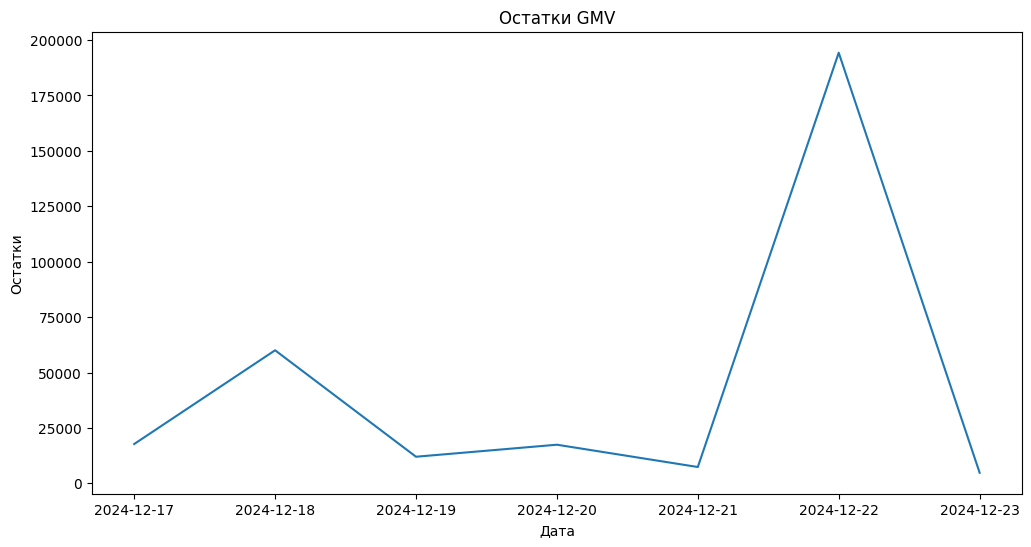

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, residuals_gmv)
plt.xlabel('Дата')
plt.ylabel('Остатки')
plt.title('Остатки GMV')
plt.show()

Если остатки были распределены нормально, то можно было бы взять K по принциму 3х сигм, то есть K = 3

Но по тесту Шапиро-Уилка p-value <= 0.05, поэтому поищем K вручную

In [65]:
# Найдите 99-й процентиль абсолютных остатков
threshold = np.quantile(np.abs(residuals_gmv), 0.99)
print(f"Порог аномалии (99-й процентиль): {threshold}")
print(f"K для порога 99-й процентииль: {threshold/std_residuals_gmv}")

Порог аномалии (99-й процентиль): 186235.7935875974
K для порога 99-й процентииль: 2.937647150331085


Так как K для порога близок к 3, то можно взять K = 3

In [58]:
K = 3
threshold_gmv = K * std_residuals_gmv
print(f"Трешхолд для поиска аномалий GMV: {threshold_gmv}")

Трешхолд для поиска аномалий GMV: 190188.73001811112


In [59]:
anomalies_gmv = residuals_gmv > threshold_gmv

print(f"Количество аномалий для фактичесокго GMV: {anomalies_gmv.sum()}")
anomalies_dates_gmv = test_dates[anomalies_gmv]
print(f"Даты аномалий для фактического GMV: {', '.join(map(str, anomalies_dates_gmv.tolist()))}")

Количество аномалий для фактичесокго GMV: 1
Даты аномалий для фактического GMV: 2024-12-22 00:00:00


In [60]:
residuals_orders = np.abs(y_orders_test.values - y_orders_pred)

std_residuals_orders = np.std(residuals_orders)
print(f"Стандартное отклонение остатков для количества заказов: {std_residuals_orders}")

Стандартное отклонение остатков для количества заказов: 227.35028594453553


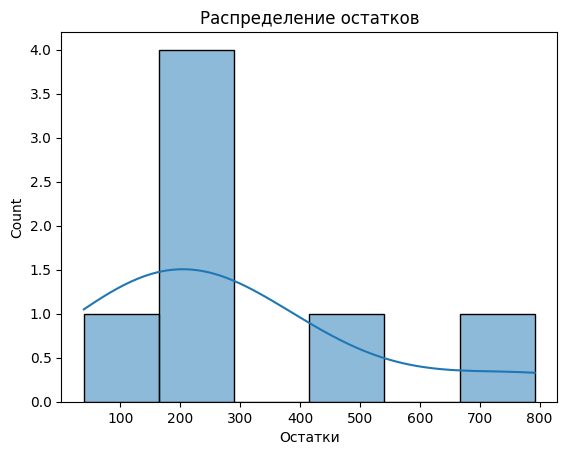

p-value теста Шапиро-Уилка: 0.0785


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals_orders, kde=True)
plt.title("Распределение остатков")
plt.xlabel("Остатки")
plt.show()

# Проверка нормальности
from scipy.stats import shapiro
stat, p = shapiro(residuals_orders)
print(f"p-value теста Шапиро-Уилка: {p:.4f}")

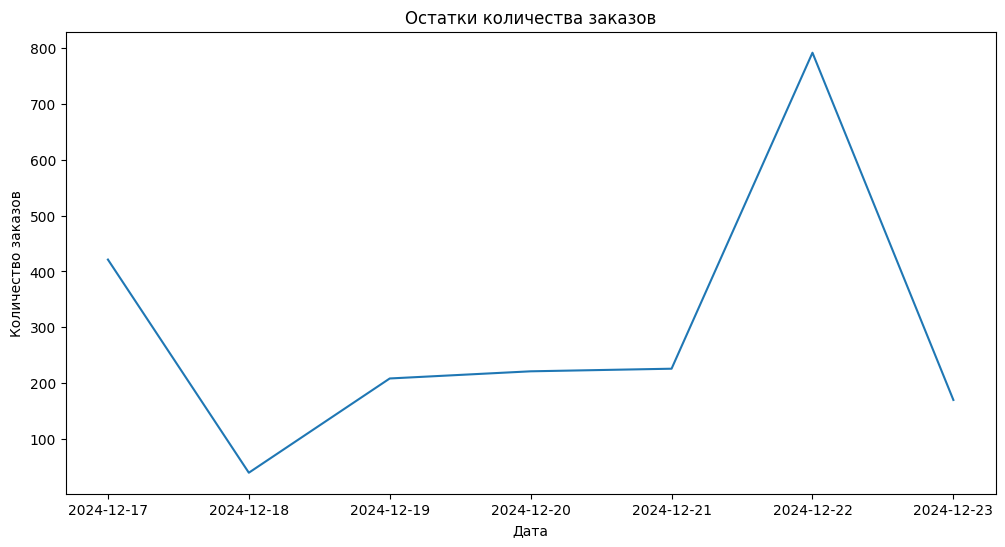

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(test_dates, residuals_orders)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Остатки количества заказов')
plt.show()

по тесту Шапиро-Уилка остатки количества заказов распределны нормально, поэтому можем сразу взять K = 3

In [68]:
K = 3
threshold_orders = K * std_residuals_orders
print(f"Трешхолд для поиска аномалий количества заказов: {threshold_orders}")

Трешхолд для поиска аномалий количества заказов: 682.0508578336066


In [69]:
anomalies_orders = residuals_orders > threshold_orders

print(f"Количество аномалий для количества заказов: {anomalies_orders.sum()}")
anomalies_dates_orders = test_dates[anomalies_orders]
print(f"Даты аномалий для фактического количества заказов: {', '.join(map(str, anomalies_dates_orders.tolist()))}")

Количество аномалий для количества заказов: 1
Даты аномалий для фактического количества заказов: 2024-12-22 00:00:00


# Задача 2

In [2]:
# 1. Сильный рост по всем фронтам (День)
daily_strong_growth = {
  "period": "2023-11-15",
  "comparison_period": "2023-11-14",
  "metrics": {
    "GMV": {"value": 1625000, "change": 0.25}, # +25%
    "Заказы": {"value": 2400, "change": 0.20},  # +20%
    "Средний чек (AOV)": {"value": 677.08, "change": 0.042}, # +4.2%
    "Сессии": {"value": 60000, "change": 0.18},  # +18%
    "Конверсия (CR)": {"value": 0.04, "change": 0.017} # +1.7%
  }
}

# 2. Сильное падение по всем фронтам (День)
daily_strong_decline = {
  "period": "2023-11-16",
  "comparison_period": "2023-11-15",
  "metrics": {
    "GMV": {"value": 980000, "change": -0.22},  # -22%
    "Заказы": {"value": 1800, "change": -0.18},  # -18%
    "Средний чек (AOV)": {"value": 544.44, "change": -0.049},# -4.9%
    "Сессии": {"value": 48000, "change": -0.15},  # -15%
    "Конверсия (CR)": {"value": 0.0375, "change": -0.035}# -3.5%
  }
}

# 3. Смешанная динамика: GMV растет, Заказы падают (День) -> Рост за счет AOV
daily_mixed_gmv_up_orders_down = {
  "period": "2023-11-17",
  "comparison_period": "2023-11-16",
  "metrics": {
    "GMV": {"value": 1060000, "change": 0.082}, # +8.2%
    "Заказы": {"value": 1710, "change": -0.05},  # -5%
    "Средний чек (AOV)": {"value": 619.88, "change": 0.139}, # +13.9%
    "Сессии": {"value": 49000, "change": 0.021},  # +2.1%
    "Конверсия (CR)": {"value": 0.0349, "change": -0.069} # -6.9%
  }
}

# 4. Смешанная динамика: GMV падает, Заказы растут (День) -> Падение за счет AOV
daily_mixed_gmv_down_orders_up = {
  "period": "2023-11-18",
  "comparison_period": "2023-11-17",
  "metrics": {
    "GMV": {"value": 985800, "change": -0.07},  # -7%
    "Заказы": {"value": 1778, "change": 0.04},  # +4%
    "Средний чек (AOV)": {"value": 554.44, "change": -0.106},# -10.6%
    "Сессии": {"value": 51000, "change": 0.041},  # +4.1%
    "Конверсия (CR)": {"value": 0.03486, "change": -0.001}# -0.1%
  }
}

# 5. Почти без изменений / Стабильность (День)
daily_flat = {
  "period": "2023-11-19",
  "comparison_period": "2023-11-18",
  "metrics": {
    "GMV": {"value": 990000, "change": 0.004}, # +0.4%
    "Заказы": {"value": 1785, "change": 0.004}, # +0.4%
    "Средний чек (AOV)": {"value": 554.62, "change": 0.0},  # 0%
    "Сессии": {"value": 51100, "change": 0.002}, # +0.2%
    "Конверсия (CR)": {"value": 0.03493, "change": 0.002} # +0.2%
  }
}

# 6. Умеренный недельный рост
weekly_moderate_growth = {
  "period": "Неделя 46, 2023",
  "comparison_period": "Неделя 45, 2023",
  "metrics": {
    "GMV": {"value": 7800000, "change": 0.09},  # +9%
    "Заказы": {"value": 13500, "change": 0.07},  # +7%
    "Средний чек (AOV)": {"value": 577.78, "change": 0.019}, # +1.9%
    "Сессии": {"value": 450000, "change": 0.05},  # +5%
    "Конверсия (CR)": {"value": 0.03, "change": 0.019} # +1.9%
  }
}

# 7. Недельное падение с аномалией в трафике (GMV/Заказы вниз, Сессии вверх)
weekly_decline_traffic_anomaly = {
  "period": "Неделя 47, 2023",
  "comparison_period": "Неделя 46, 2023",
  "metrics": {
    "GMV": {"value": 7332000, "change": -0.06}, # -6%
    "Заказы": {"value": 12420, "change": -0.08}, # -8%
    "Средний чек (AOV)": {"value": 590.34, "change": 0.022}, # +2.2%
    "Сессии": {"value": 472500, "change": 0.05},  # +5% (аномалия!)
    "Конверсия (CR)": {"value": 0.0263, "change": -0.124} # -12.4%
  }
}

# 8. Фокус на конверсии (День) (GMV/Заказы стабильны, Сессии упали -> CR выросла)
daily_conversion_focus = {
  "period": "2023-11-20",
  "comparison_period": "2023-11-19",
  "metrics": {
    "GMV": {"value": 995000, "change": 0.005}, # +0.5%
    "Заказы": {"value": 1790, "change": 0.003}, # +0.3%
    "Средний чек (AOV)": {"value": 555.87, "change": 0.002}, # +0.2%
    "Сессии": {"value": 48545, "change": -0.05}, # -5%
    "Конверсия (CR)": {"value": 0.03687, "change": 0.056} # +5.6%
  }
}

# 9. Рост за счет AOV (Неделя) (GMV умеренно вырос, Заказы слегка упали)
weekly_aov_driven_growth = {
  "period": "Неделя 48, 2023",
  "comparison_period": "Неделя 47, 2023",
  "metrics": {
    "GMV": {"value": 7845240, "change": 0.07},  # +7%
    "Заказы": {"value": 12234, "change": -0.015}, # -1.5%
    "Средний чек (AOV)": {"value": 641.25, "change": 0.086}, # +8.6%
    "Сессии": {"value": 470000, "change": -0.005}, # -0.5%
    "Конверсия (CR)": {"value": 0.0260, "change": -0.01} # -1%
  }
}

# 10. Резкий всплеск (например, старт большой распродажи) (День)
daily_promo_spike = {
  "period": "2023-11-24", # Черная пятница :)
  "comparison_period": "2023-11-23",
  "metrics": {
    "GMV": {"value": 2400000, "change": 0.6},  # +60%
    "Заказы": {"value": 3100, "change": 0.55},  # +55%
    "Средний чек (AOV)": {"value": 774.19, "change": 0.032}, # +3.2%
    "Сессии": {"value": 80000, "change": 0.4},  # +40%
    "Конверсия (CR)": {"value": 0.03875, "change": 0.107} # +10.7%
  }
}

Для решения этой задачи я решил использовать api от openrouter.ai, которые предоставляют популярные модели LLM бесплатно и маленькую модель с hugging face

1.  **Qwen3-235B-A22B (через OpenRouter API)**: Большая и мощная модель, ожидается высокая точность и качество текста.
2.  **Qwen3-0.6B (локально через Hugging Face Transformers)**: Компактная модель, предназначенная для инференса на более слабых устройствах, используется для сравнения с более крупной моделью.


In [ ]:
api_key = ""

In [30]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=api_key,
)


Промпт разработан таким образом, чтобы явно указать модели роль (бизнес-аналитик) и формат вывода (краткая сводка в 2-4 предложения на русском языке). В промпт включены все необходимые данные KPI за два периода, а также процентные изменения для каждой метрики.

Добавлены упоминания, что надо сделать объяснение по всем основным изменениям, а также ограничения, что надо использовать только предоставленную информацию

In [34]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
    Ты бизнес-аналитик, подготовь краткую сводку для менеджера на основе следующих данных KPI за период {period} по сравнению с {comparison_period}.

    Данные:
    - GMV: {gmv_value}, изменение: {gmv_change:.1%}
    - Заказы: {orders_value}, изменение: {orders_change:.1%}
    - Средний чек (AOV): {aov_value}, изменение: {aov_change:.1%}
    - Сессии: {sessions_value}, изменение: {sessions_change:.1%}
    - Конверсия (CR): {cr_value}, изменение: {cr_change:.1%}

    Сводка должна содержать 2-4 предложения на русском языке. Упомяни ключевую метрику (GMV), ее динамику (рост/падение в процентах).
    Если другие метрики изменились значительно (например, >5%), упомяни их кратко.
    Объясни возможные причины изменений, если они очевидны из данных (например, рост GMV при падении заказов может быть связан с увеличением среднего чека).
    Используй только предоставленные данные, без дополнительной информации.
    """
    )

In [32]:
def get_kpi_summary_openrouter(kpi_data, model="qwen/qwen3-235b-a22b:free"):
    period = kpi_data["period"]
    comparison_period = kpi_data["comparison_period"]
    metrics = kpi_data["metrics"]

    gmv_value = metrics["GMV"]['value']
    gmv_change = metrics["GMV"]['change']
    orders_value = metrics["Заказы"]['value']
    orders_change = metrics["Заказы"]['change']
    aov_value = metrics["Средний чек (AOV)"]['value']
    aov_change = metrics["Средний чек (AOV)"]['change']
    sessions_value = metrics["Сессии"]['value']
    sessions_change = metrics["Сессии"]['change']
    cr_value = metrics["Конверсия (CR)"]['value']
    cr_change = metrics["Конверсия (CR)"]['change']

    prompt = prompt_template.format(
        period=period,
        comparison_period=comparison_period,
        gmv_value=gmv_value,
        gmv_change=gmv_change,
        orders_value=orders_value,
        orders_change=orders_change,
        aov_value=aov_value,
        aov_change=aov_change,
        sessions_value=sessions_value,
        sessions_change=sessions_change,
        cr_value=cr_value,
        cr_change=cr_change
    )

    completion = client.chat.completions.create(
      model=model,
      messages=[
        {
          "role": "user",
          "content": prompt
        }
      ]
    )

    return completion.choices[0].message.content

In [33]:
get_kpi_summary_openrouter(daily_strong_growth, model="qwen/qwen3-235b-a22b:free")

'За период с 2023-11-15 по сравнению с 2023-11-14 наблюдался значительный рост ключевой метрики GMV на 25% (до 1 625 000), что обусловлено увеличением количества заказов на 20% (до 2400) и ростом среднего чека (AOV) на 4.2% (до 677,08). Повышение конверсии (CR) на 1.7% и рост сессий на 18% (до 60 000) косвенно подтверждают усиление пользовательской активности, однако основной вклад в рост GMV внесло сочетание большего объема заказов и их усредненной стоимости. Важно уточнить причины роста среднего чека – например, повышение цен, увеличение количества товаров в заказах или рост доли дорогих товаров.'

In [20]:
get_kpi_summary_openrouter(daily_flat, model="qwen/qwen3-235b-a22b:free")

'GMV вырос на 0.4% (до 990 000), что совпадает с аналогичным увеличением количества заказов (+0.4%, 1785). Средний чек остался стабильным (554.62), конверсия снизилась на 0.2% (0.03493), а сессии увеличились на 0.2% (51 100). Рост GMV обусловлен ростом заказов при сохранении среднего чека, при этом конверсия и сессии демонстрируют минимальные колебания (менее 0.5%), что, скорее всего, связано с естественной волатильностью данных. Значимых отклонений в других метриках не наблюдается — все изменения в пределах 5%.'

In [6]:
get_kpi_summary_openrouter(weekly_aov_driven_growth, model="qwen/qwen3-235b-a22b:free")

'За Неделю 48, 2023 год наблюдался рост GMV на 7,0% относительно Недели 47, что связано с увеличением среднего чека (AOV) на 8,6% при сокращении объема заказов на 1,5%. Снижение количества заказов (-1,5%) и конверсии (CR на -1,0%) может указывать на уменьшение доли покупателей среди пользователей, однако рост AOV компенсировал эти потери, сохранив положительную динамику GMV. Стабильность трафика (сессии изменились незначительно, -0,5%) позволяет предположить, что изменения в поведении аудитории и факторах ценоформирования стали основными драйверами результата.'

In [21]:
get_kpi_summary_openrouter(daily_promo_spike, model="qwen/qwen3-235b-a22b:free")

'За отчетный период по сравнению с предыдущим GMV вырос на 60% по сравнению с предыдущей датой, что обусловлено значительным увеличением количества заказов на 55% и повышением конверсии (CR) на 10.7% при росте сессий на 40%. Ключевые drivers изменений — улучшение конверсии посетителей в клиентов и наращивание трафика, при этом рост среднего чека (+3.2%) оказал минимальное влияние на итоговый результат.'

In [24]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def get_kpi_summary(kpi_data, model_name="Qwen/Qwen3-8B"):
    period = kpi_data["period"]
    comparison_period = kpi_data["comparison_period"]
    metrics = kpi_data["metrics"]

    gmv_value = metrics["GMV"]['value']
    gmv_change = metrics["GMV"]['change']
    orders_value = metrics["Заказы"]['value']
    orders_change = metrics["Заказы"]['change']
    aov_value = metrics["Средний чек (AOV)"]['value']
    aov_change = metrics["Средний чек (AOV)"]['change']
    sessions_value = metrics["Сессии"]['value']
    sessions_change = metrics["Сессии"]['change']
    cr_value = metrics["Конверсия (CR)"]['value']
    cr_change = metrics["Конверсия (CR)"]['change']

    prompt = prompt_template.format(
        period=period,
        comparison_period=comparison_period,
        gmv_value=gmv_value,
        gmv_change=gmv_change,
        orders_value=orders_value,
        orders_change=orders_change,
        aov_value=aov_value,
        aov_change=aov_change,
        sessions_value=sessions_value,
        sessions_change=sessions_change,
        cr_value=cr_value,
        cr_change=cr_change
    )

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        torch_dtype="auto",
        device_map="auto"
    )

    messages = [
        {"role": "user", "content": prompt}
    ]

    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
        enable_thinking=True
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=32768
    )
    output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist()

    try:
        index = len(output_ids) - output_ids[::-1].index(151668)
    except ValueError:
        index = 0

    content = tokenizer.decode(output_ids[index:], skip_special_tokens=True).strip("\n")

    return content

In [27]:
get_kpi_summary(daily_strong_growth, model_name="Qwen/Qwen3-0.6B")

'**Сводка:**  \n- **ГМВ** растет на 25% (рост), что указывает на увеличение объема продаж.  \n- **Заказы** увеличились на 20% (рост), что подтверждает рост клиентов.  \n- **Средний чек** падает на 4.2% (снижение), возможно связанное с увеличением объема или снижением цен.  \n- **Сессии** увеличены на 18% (рост), но не настолько значительным.  \n\n**Объяснение:**  \nРост GMV может быть связан с увеличением среднего чека, а не с уменьшением.'

In [28]:
get_kpi_summary(daily_flat, model_name="Qwen/Qwen3-0.6B")

'- **ГМВ** вырос на 0.4%, что подтверждает устойчивый рост.  \n- **Сессии** увеличилась на 0.2%, а **конверсия** рос на 0.2%, но **средний чек** падает на 0.0%, что может указывать на снижение затрат.  \n- Рост **ГМВ** может быть связан с уменьшением затрат (например, снижение чека), что в свою очередь влияет на общую сумму заказов.'

In [12]:
get_kpi_summary(weekly_aov_driven_growth, model_name="Qwen/Qwen3-0.6B")

'- **Гross Margin (GMV)** показал рост на 7%, что подтверждает увеличение продаж.  \n- **Заказы** с -1.5% указывают на снижение объема, но это не отрицательный момент.  \n- **Средний чек** с +8.6% отражает улучшение ценности продукта, что связано с уменьшением конверсии.  \n\n**Возможные причины изменений**: Уменьшение заказов может быть связано с увеличением среднего чека, что снижает конверсию, что и отражается на закупках.'

In [29]:
get_kpi_summary(daily_promo_spike, model_name="Qwen/Qwen3-0.6B")

'1. **ГМВ рос на 60% по сравнению с 2023-11-23**, что подтверждает стабильность или рост.  \n2. **Заказы подскочили на 55%**, что указывает на увеличение объема, но уменьшение среднего чека (3.2%) может требовать улучшения конверсии.  \n3. **Сессии увеличилась на 40%**, а конверсия снизилась на 10.7%, что может быть связано с снижением трафика.'

### Возможные проблемы и пути улучшения

**Проблемы:**

1.  **Точность интерпретации:** LLM может некорректно интерпретировать взаимосвязи между метриками, особенно в более сложных сценариях
2.  **Шаблонность ответов:** Модель может генерировать слишком однотипные сводки для разных сценариев.
3.  **Обработка большого разнообразия метрик:** Текущий промпт зафиксирован на конкретном наборе метрик. Добавление новых метрик потребует изменения промпта.
4.  **Чувствительность к формулировкам:** Незначительные изменения в промпте могут существенно повлиять на результат.
5.  **Ограничения контекста:** При большом количестве метрик или более длительном периоде сравнения, контекстное окно модели может стать ограничением.

**Пути улучшения:**

1. Использовать few-shot learning, предоставляя несколько примеров "данные -> сводка".
2. Более явно указывать, как интерпретировать конкретные комбинации изменений метрик, например что всегда какая-то метрика растет от другой
3. Разбить генерацию на несколько шагов (например, сначала выявить ключевые изменения, затем сгенерировать объяснение, затем объединить в сводку).

Сравнение результатов двух моделей Qwen3 показывает, что большая модель (235B) дает более развернутые и осмысленные сводки, лучше следуя инструкциям промпта. Меньшая модель (0.6B), хотя и генерирует текст быстрее и требует меньше ресурсов, дает более поверхностные и иногда менее точные интерпретации (например, путает рост среднего чека со снижением затрат). Для критически важных бизнес-сводок предпочтительнее использовать более мощные модели, а компактные модели могут быть полезны для быстрых черновиков или в условиях ограниченных ресурсов.